이번 실습에서는 Image에 대한 SVD의 예를 간단히 살펴 봅니다. Digital image는 각각의 pixel의 색을 나타내는 숫자들로 이루어진 matrix로 볼 수 있습니다. 영상데이터를 저장하고 전송함에 있어 데이터의 크기는 비용과 직결되는 굉장히 중요한 문제입니다. 우리는 문제가 되지 않는 선에서 데이터의 크기를 줄이고자 하고, 이러한 과정을 압축이라고 부릅니다. 압축과 관련하여 SVD가 어떤 식으로 활용이 될 수 있는지 살펴봅니다. (실제 영상압축에서는 SVD뿐만 아니라 다양한 접근방법이 존재합니다.)

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

실습을 위해 인터넷에서 흑백영상을 하나 가져오도록 합니다. 칼라영상인 경우에는 여러 개의 채널을 가지므로, 각각의 채널에 대한 추가적인 연산이 필요합니다. I.shape을 통하여 영상을 표현하는 matrix의 크기를 확인해 봅시다.

In [2]:
img = 'https://upload.wikimedia.org/wikipedia/commons/5/56/Golden_Doodle_dog_hip_xray_posterior_view.jpg'
I = io.imread(img)
I = np.array(I)
I.shape

(4248, 3480)

다음과 같은 코드를 실행하여 영상이 제대로 matrix로 저장이 되었는지 확인해 볼 수 있습니다.

uint8


(-0.5, 3479.5, 4247.5, -0.5)

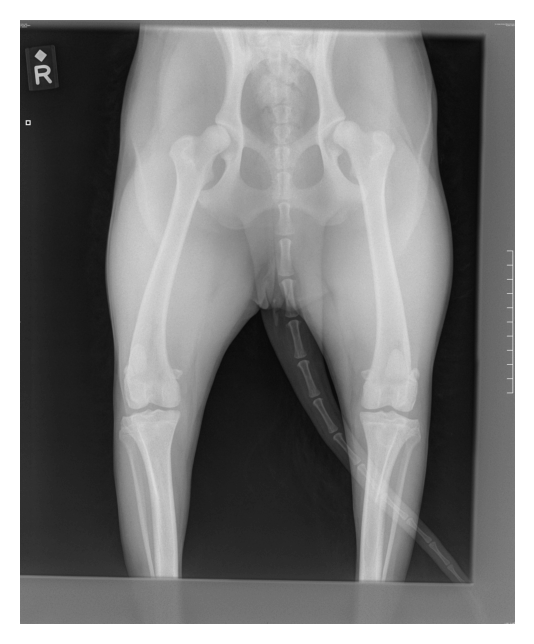

In [3]:
print(I.dtype)
plt.figure(dpi=200)
plt.imshow(I,cmap='gray')
plt.axis('off')

SVD는 np.linalg.svd를 통해 행해질 수 있습니다. svd는 U, sig, V를 반환합니다.

In [4]:
U,sig,V = np.linalg.svd(I)

반환된 matrix들의 shape를 확인해 봅시다. sigular value로 구성되는 sig는 diagonal matrix이기 때문에 대각성분만을 vector로 반환하였습니다.

In [5]:
print(U.shape)
print(sig.shape)
print(V.shape)

(4248, 4248)
(3480,)
(3480, 3480)


U 또는 V의 vector들(singular vector)의 length가 1인지 확인해 봅시다. 정확히 1이 되지는 못해도 거의 1에 가까움을 확인할 수 있을 것입니다.

In [6]:
print(np.linalg.norm(V[:,1]))

1.0000000000000004


sigular value는 크기 순으로 정렬되어 있습니다. 10번째 singular value까지 출력해봅니다. np.diag를 이용하여 singular value들을 diagonal matrix로 구성할 수 있습니다.

In [7]:
print(sig[:10])
Sig = np.diag(sig)
print(Sig.shape)

[458421.39205117 112759.63849648  61628.92091187  48094.55267732
  26967.36353159  20702.35915359  16769.58508596  14099.36424955
  12690.3967429   11129.38872423]
(3480, 3480)


가장 큰 singular value에 해당하는 성분만을 가져와서 matrix를 구성하고, 이를 통해 나타나는 영상을 확인해보겠습니다.

(4248, 1)
(1,)
(1, 3480)


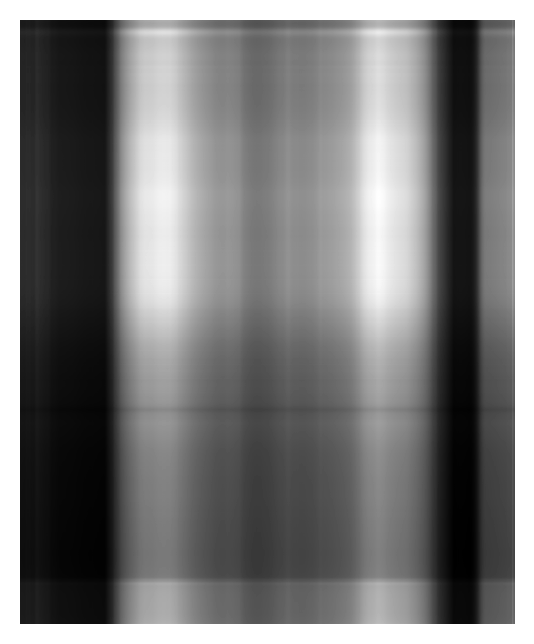

In [8]:
n=1
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.show()

10번째 성분까지 사용하여 영상을 만들어 보겠습니다.

(4248, 10)
(10,)
(10, 3480)


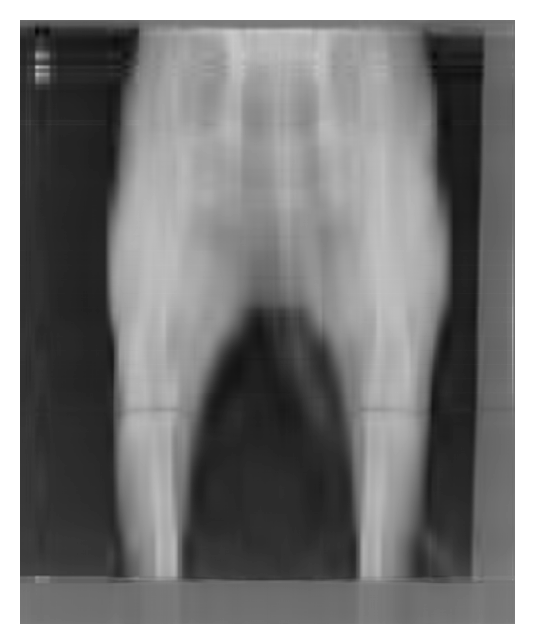

In [9]:
n=10
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.show()

n을 점점 키우면서 영상을 확인하여 어느 정도 n이면 원본과 충분히 비슷한지, 그리고 그 때의 데이터를 표현하기 위해 사용된 숫자의 개수를 원본 matrix의 숫자의 개수와 비교해 봅시다.

(4248, 50)
(50,)
(50, 3480)


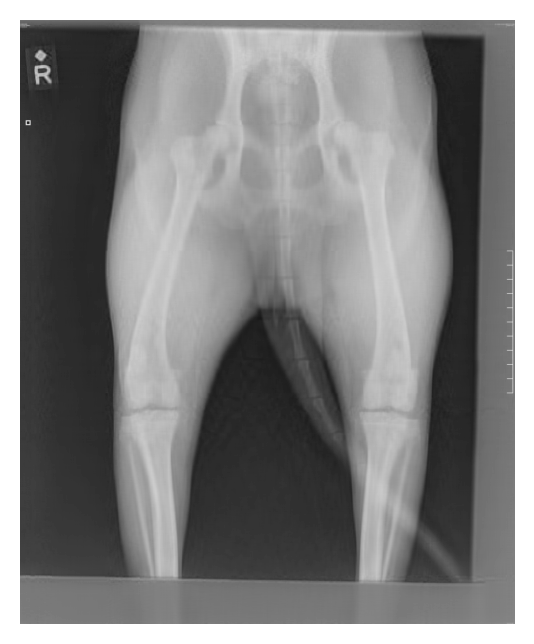

In [10]:
n=50
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.show()